# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

Dataset Overview

- ID = Customer's id
- Year_Birth = Customer's year of birth
- Education = Customer’s level of education
- Marital_Status = Customer’s marital status
- Income = Customer’s yearly household income
- Kidhome = Number of small children in customer’s household
- Teenhome = Number of teenagers in customer’s household
- Dt_Customer = Date of customer’s enrolment with the company
- Recency = Number of days since the last purchase
- MntWines = Amount spent on wine products in the last 2 years
- MntFruits = Amount spent on fruits products in the last 2 years
- MntMeatProducts = Amount spent on meat products in the last 2 years
- MntFishProducts = Amount spent on fish products in the last 2 years
- MntSweetProducts = Amount spent on sweet products in the last 2 years
- MntGoldProds = Amount spent on gold products in the last 2 years
- NumDealsPurchases = Number of purchases made with discount
- NumWebPurchases = Number of purchases made through company’s web site
- NumCatalogPurchases = Number of purchases made using catalogue
- NumStorePurchases = Number of purchases made directly in stores
- NumWebVisitsMonth = Number of purchases made through company’s web site
- AcceptedCmp3 = 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 = 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 = 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1 = 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 = 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Complain = 1 if customer complained in the last 2 years
- Z_CostContact = Cost to contact a customer
- Z_Revenue = Revenue after client accepting campaign
- Response =1 if customer accepted the offer in the last campaign, 0 otherwise

In [477]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [325]:
# show all columns
pd.set_option('display.max_columns', None)

In [326]:
# load dataset
df = pd.read_csv(r'D:\Rakamin Data Science\Job Acceleration Program\Mini Project 3 - Predict Customer Personality\marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## EDA

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [328]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0


In [329]:
# cek data duplikat
df.duplicated().sum()

0

In [330]:
# cek missing value
mv = df.isnull().sum()
tmv = df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv], axis=1)
mdf.columns=['Missing Value Total', 'Missing Value Percentage (%)']
mdf

,Missing Value Total,Missing Value Percentage (%)
Unnamed: 0,0,0.000000
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Income,24,1.071429
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000


In [331]:
# ubah tipe data
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].max())
print(df['Dt_Customer'].min())

2014-12-06 00:00:00
2012-01-08 00:00:00


### Feature Extraction

In [332]:
# buat kolom year joined
df['Year_Joined'] = 2023 - df['Dt_Customer'].dt.year

In [333]:
# buat kolom Age
df['Age'] = 2023 - df['Year_Birth']

In [334]:
df['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [335]:
# buat kolom age group
def cat_age(data):
    if data < 20:
        return 1 # Remaja
    elif data <= 45:
        return 2 # Dewasa
    elif data <= 60:
        return 3 # Senior
    else:
        return 4 # Lansia
    
cat_age = df_feat['Age'].apply(lambda data: cat_age(data))
df['Age_group'] = cat_age

df[['Year_Joined','Year_Birth','Age','Age_group']].sample(5)

,Year_Joined,Year_Birth,Age,Age_group
479,11,1977,46,3
588,9,1955,68,4
240,10,1968,55,3
1034,9,1973,50,3
1873,10,1948,75,4


In [336]:
# buat kolom number of kids
df['Num_of_kids'] = df['Kidhome'] + df['Teenhome']

# buat kolom is_parent
df['Is_parent'] = np.where(df['Num_of_kids'] > 0, 1, 0)

In [337]:
# buat kolom total accepted campaign
df['Total_acc_cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [338]:
# buat kolom total spent
df['Total_spent'] = df['MntCoke'] + df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts']

In [339]:
# buat kolom total transaction purchased
df['Total_trx'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [340]:
df[['Num_of_kids','Is_parent','Total_acc_cmp','Total_spent','Total_trx']].sample(5)

,Num_of_kids,Is_parent,Total_acc_cmp,Total_spent,Total_trx
2113,1,1,0,133000,7
8,1,1,1,46000,6
138,2,1,2,49000,6
234,1,1,0,1117000,29
1306,2,1,0,401000,19


Conversion Rate (CVR)
- Conversion rate adalah persentase pengunjung terhadap jumlah visit website.
- Conversion Rate = Total purchases atau transaksi / Jumlah visit per bulan

In [341]:
# menghitung conversion rate
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df['CVR'] = round(df.apply(lambda x: cvr(x['Total_trx'],x['NumWebVisitsMonth']), axis=1), 2)

In [342]:
df['CVR'].describe()

count    2240.000000
mean        4.395170
std         4.913677
min         0.000000
25%         1.220000
50%         2.600000
75%         5.347500
max        43.000000
Name: CVR, dtype: float64

In [343]:
df.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Joined,Age,Age_group,Num_of_kids,Is_parent,Total_acc_cmp,Total_spent,Total_trx,CVR
438,438,5455,1971,S3,Menikah,32011000.0,1,0,2013-08-22,89,99000,0,15000,2000,1000,5000,3,2,1,4,7,0,0,0,0,0,0,3,11,0,10,52,3,1,1,0,122000,10,1.43
1153,1153,5031,1974,S1,Bertunangan,83145000.0,0,0,2012-09-22,14,777000,35000,731000,39000,137000,114000,1,5,9,11,2,0,0,1,0,0,0,3,11,1,11,49,3,0,0,2,1833000,26,13.00
404,404,2552,1955,S3,Lajang,55521000.0,1,2,2013-10-22,11,416000,0,26000,0,0,4000,9,6,3,6,7,0,1,0,0,0,0,3,11,1,10,68,4,3,1,2,446000,24,3.43


## EDA (plot)

### Univariate Analysis

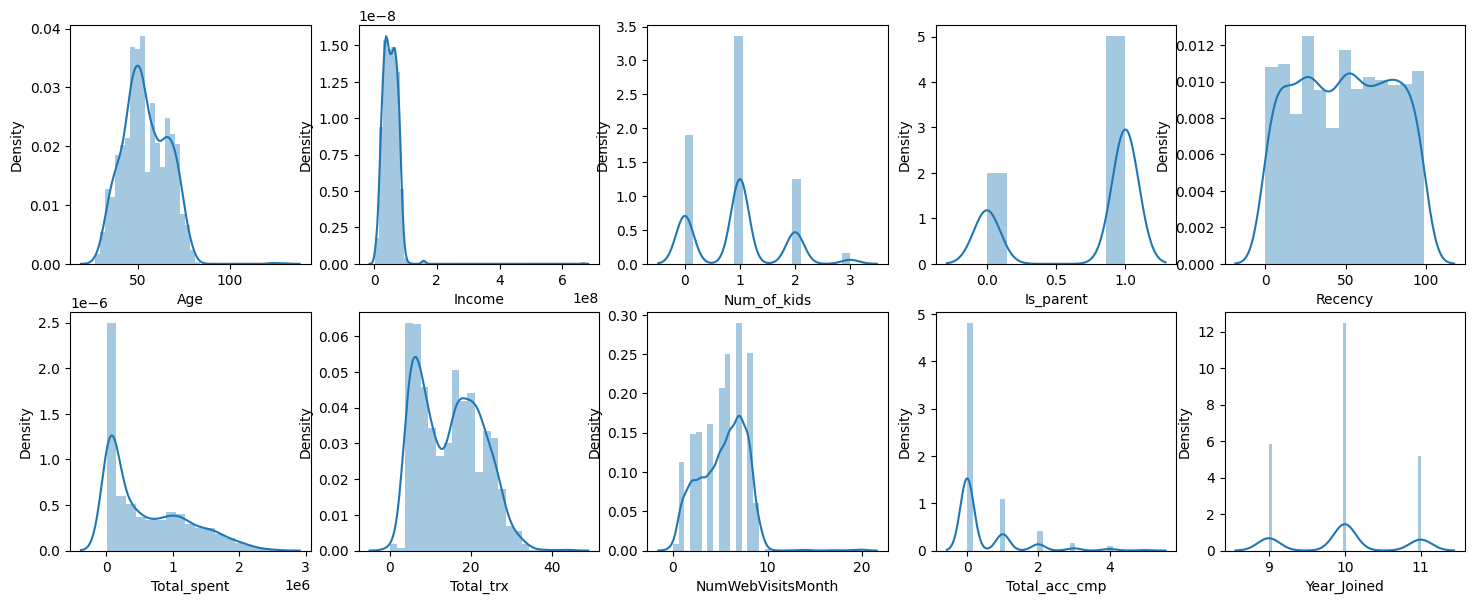

In [367]:
# grouping numerical columns
num = ['Age','Income','Num_of_kids','Is_parent','Recency','Total_spent','Total_trx','NumWebVisitsMonth','Total_acc_cmp',
       'Year_Joined']

plt.figure(figsize=(18,18))
for i, col in enumerate(df[num],1):
    plt.subplot(5,5,i)
    ax = sns.distplot(df[col])


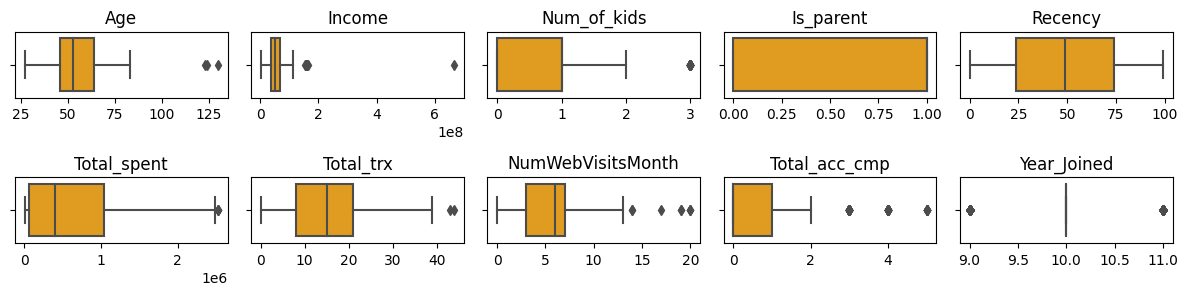

In [368]:
# buat boxplot
plt.figure(figsize=(12,7))
for i in range(len(num)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data=df, x=num[i], color='orange')
    plt.title(f'{num[i]}')
    plt.xlabel('')
plt.tight_layout()

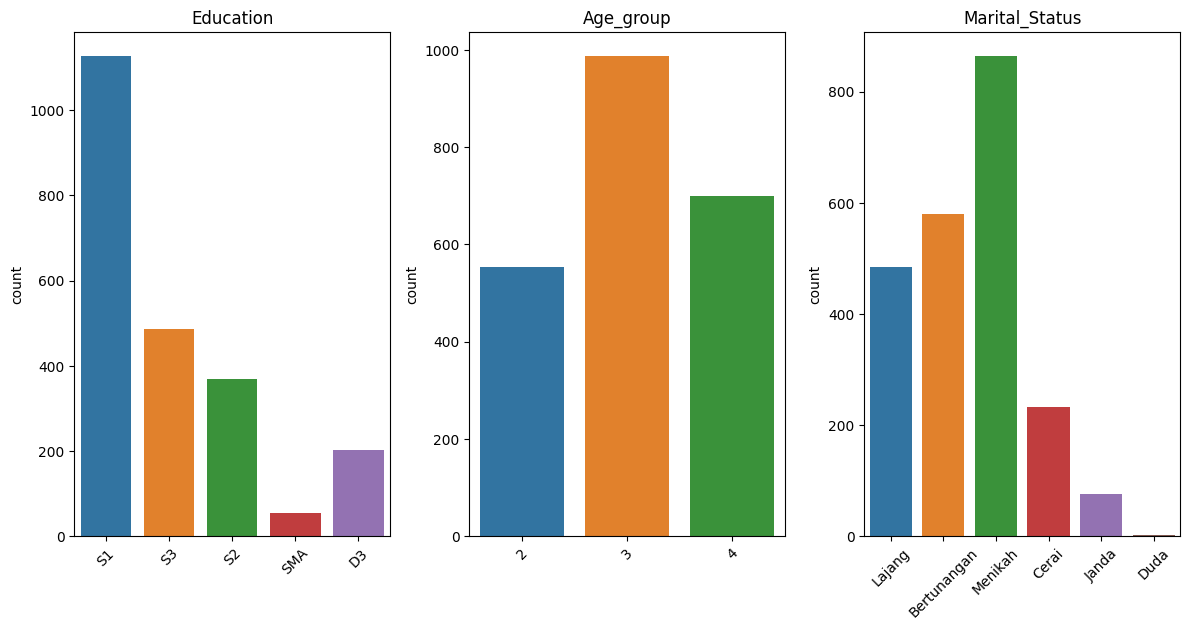

In [346]:
# grouping categorical columns
cat = ['Education','Age_group','Marital_Status']

plt.figure(figsize=(12,6))
for i in range(len(cat)):
    plt.subplot(1,3,i+1)
    sns.countplot(x=cat[i], data=df)
    plt.title(cat[i])
    plt.tight_layout()
    plt.xlabel('')
    plt.xticks(rotation=45)

### Bivariate Analysis

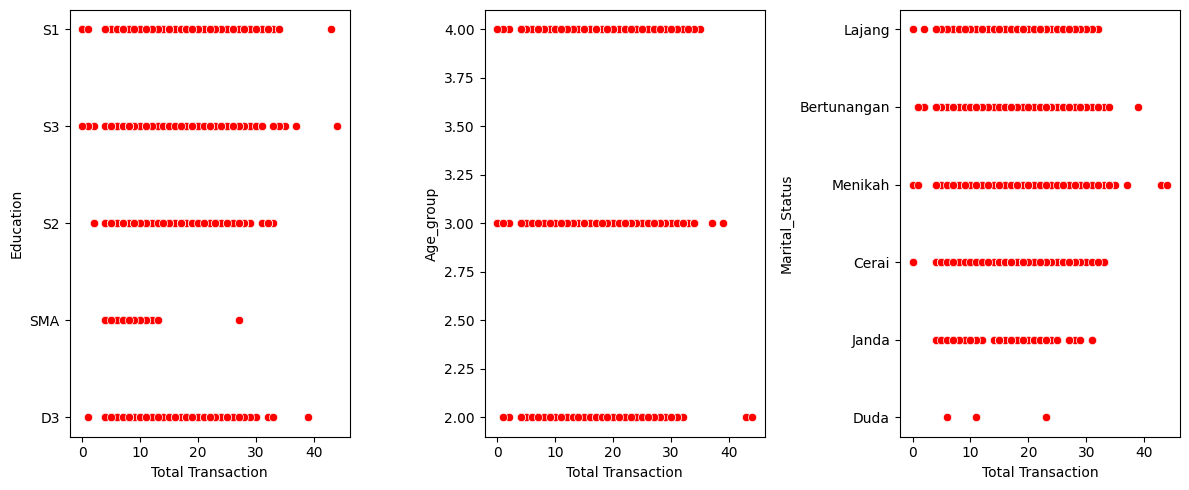

In [347]:
# scatterplot kolom categorical
plt.figure(figsize=(12, 5))
for i in range(0, len(cat)):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df['Total_trx'], y=df[cat[i]], color = 'red')
    plt.xlabel('Total Transaction')
    plt.tight_layout()

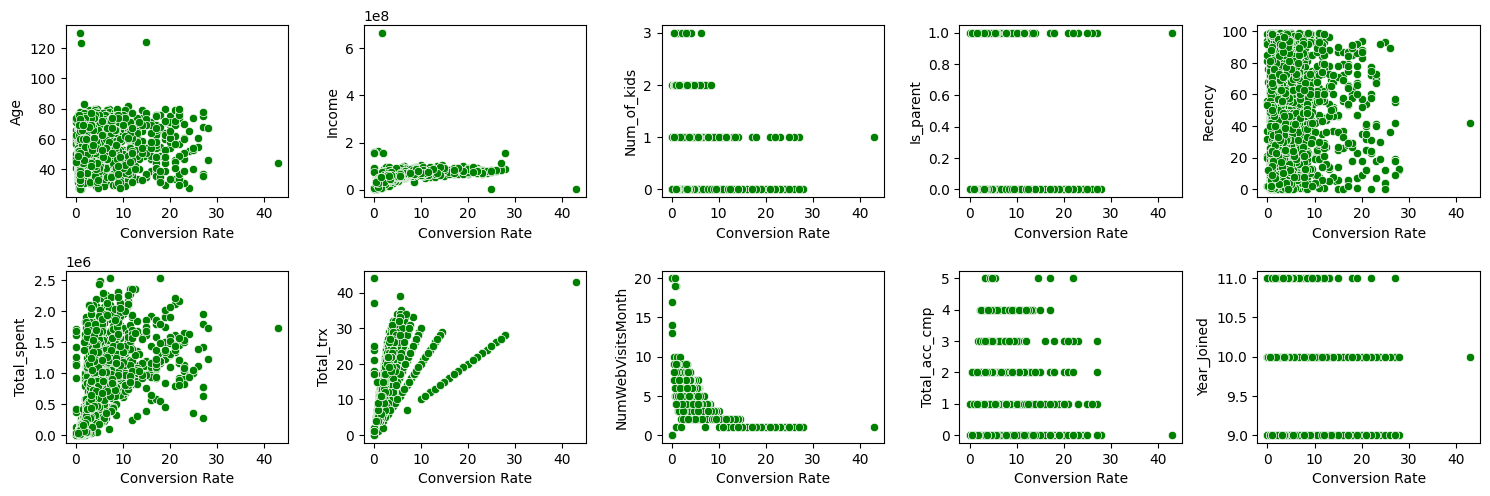

In [372]:
# scatterplot kolom numerical
plt.figure(figsize=(15, 12))
for i in range(0, len(num)):
    plt.subplot(5, 5, i+1)
    sns.scatterplot(x=df['CVR'], y=df[num[i]], color = 'green')
    plt.xlabel('Conversion Rate')
    plt.tight_layout()

**Hasil Pengamatan:**
- Pelanggan yang berumur 41-60 tahun melakukan transaksi paling banyak.
- Pelanggan yang sudah menikah lebih banyak melakukan transaksi dibandingkan yang tidak menikah.
- Semakin tinggi income, maka semakin besar juga conversion rate-nya.
- Semakin sedikit jumlah anak, maka semakin besar conversion rate-nya.
- Mayoritas pelanggan yang sering mengunjungi website, memiliki  conversion rate yang rendah.
- Total transaksi dan total spent memiliki korelasi negatif dengan conversion rate.

### Multivariate Analysis

<Axes: >

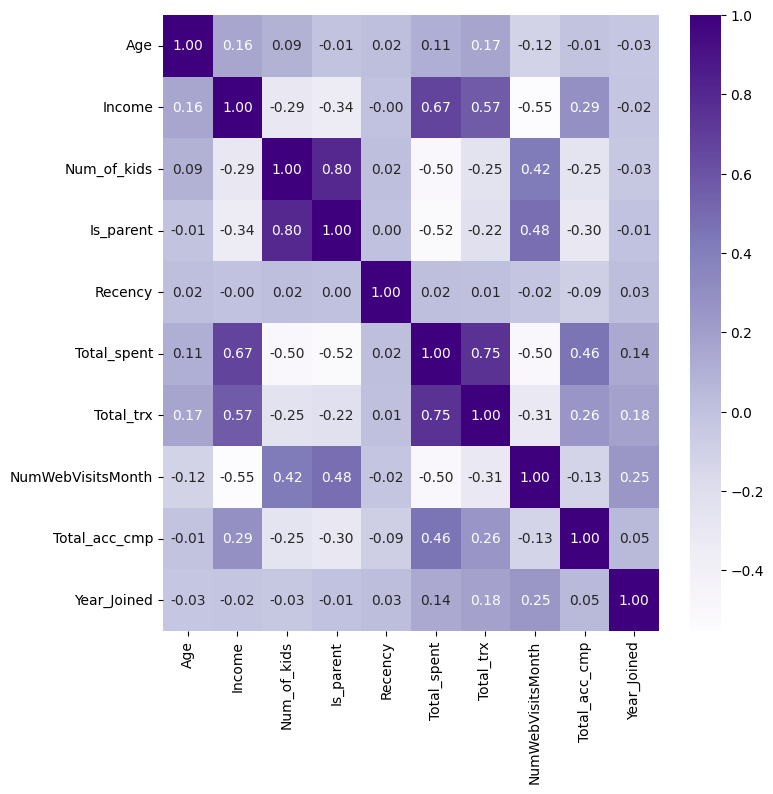

In [349]:
corr = df[num].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(df[num].corr(), cmap='Purples', annot=True, fmt='.2f')

**Hasil Pengamatan:**
- `Num_of_kids` dan `Is_parent` bersifat redundant, sehingga bisa didrop salah satunya.
- Redundant juga terjadi pada `Total_trx` dengan `Total_spent`.
- `Income` memiliki korelasi yang tinggi terhadap `Total_spent`.
- `NumWebVisitMonth` memiliki korelasi negatif dengan `Income` dan korelasi positif dengan `Is_parent`

## Data Cleaning & Pre-processing

In [484]:
df_pre = df.copy()

In [485]:
# handling missing value
df_pre['Income'] = df_pre['Income'].fillna(df_pre['Income'].mean())
print("Banyak missing value pada kolom Income :",df_pre['Income'].isna().sum())

Banyak missing value pada kolom Income : 0


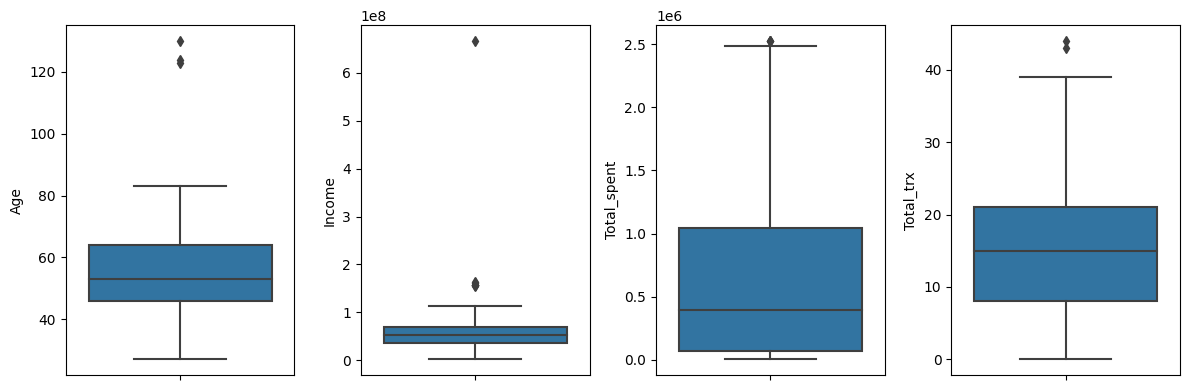

In [486]:
# handling outliers
col_outl = ['Age', 'Income','Total_spent', 'Total_trx']
plt.figure(figsize=(12,4))
for i in range(len(col_outl)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(data=df_pre, y=col_outl[i])
    plt.tight_layout()

In [487]:
# remove outlier
print('Jumlah data sebelum remove outlier : ', df_pre.shape)

col_outl = ['Age', 'Income','Total_spent', 'Total_trx']
for i in col_outl:
    q1 = df_pre[i].quantile(0.25)
    q3 = df_pre[i].quantile(0.75)
    iqr = q3-q1
    low_limit = q1 - (1.5*iqr)
    high_limit = q3 + (1.5*iqr)
    df_pre = df_pre[(df_pre[i]>low_limit) & (df_pre[i]<high_limit)]


print('Jumlah data setelah remove outlier : ', df_pre.shape)

Jumlah data sebelum remove outlier :  (2240, 39)
Jumlah data setelah remove outlier :  (2225, 39)


### Feature Encoding

In [488]:
df_pre['Marital_Status'].value_counts()

Menikah        860
Bertunangan    574
Lajang         481
Cerai          230
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

In [489]:
status = np.where((df_pre['Marital_Status']=='Bertunangan') |
                  (df_pre['Marital_Status']=='Lajang') |
                  (df_pre['Marital_Status']=='Cerai') |
                  (df_pre['Marital_Status']=='Janda') |
                  (df_pre['Marital_Status']=='Duda'),'0','1')
df_pre['Marital_Status'] = status

In [490]:
# Single (Bertunangan, Lajang, Cerai, Janda, Duda) = 0
# Married (Menikah) = 1

df_pre['Marital_Status'].value_counts()

0    1365
1     860
Name: Marital_Status, dtype: int64

In [491]:
df_pre.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Joined,Age,Age_group,Num_of_kids,Is_parent,Total_acc_cmp,Total_spent,Total_trx,CVR
0,0,5524,1957,S1,0,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,11,66,4,0,0,1,1617000,25,3.57
1,1,2174,1954,S1,0,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,9,69,4,2,1,0,27000,6,1.20
2,2,4141,1965,S1,0,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,10,58,3,0,0,0,776000,21,5.25
3,3,6182,1984,S1,0,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,9,39,2,1,1,0,53000,8,1.33
4,4,5324,1981,S3,1,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,9,42,2,1,1,0,422000,19,3.80


### Feature Selection

In [492]:
# hapus kolom yang tidak dipakai
col_drop = ['Unnamed: 0','ID','Year_Birth','Education','Kidhome','Teenhome','Dt_Customer','Z_CostContact','Z_Revenue']
df_pre = df_pre.drop(col_drop, axis = 1)

In [493]:
df_pre.sample(3)

,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Joined,Age,Age_group,Num_of_kids,Is_parent,Total_acc_cmp,Total_spent,Total_trx,CVR
519,1,80184000.0,19,1035000,134000,670000,25000,38000,0,1,6,3,10,3,0,0,1,1,0,0,0,9,79,4,0,0,2,1902000,20,6.67
874,0,61346000.0,34,562000,58000,168000,43000,16000,142000,1,5,7,10,3,0,0,0,0,0,0,0,10,45,2,1,1,0,989000,23,7.67
1855,0,74290000.0,70,1121000,0,72000,0,12000,12000,4,10,8,10,6,0,1,0,1,0,0,0,10,52,3,1,1,2,1217000,32,5.33


### Standardization

In [494]:
from sklearn.preprocessing import StandardScaler
df_std = df_pre.copy()
col = df_std.columns.values
ss = StandardScaler()

df_std[col]= ss.fit_transform(df_std[col])
df_std.head()

,Marital_Status,Income,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_Joined,Age,Age_group,Num_of_kids,Is_parent,Total_acc_cmp,Total_spent,Total_trx,CVR
0,-0.793748,0.318302,0.306589,0.987228,1.561627,1.775507,2.457766,1.482600,0.842875,0.364484,1.404791,2.693536,-0.558755,0.688178,-0.280226,-0.284863,-0.277417,-0.262076,-0.116908,-0.095238,2.387846,1.498988,1.014393,1.254464,-1.268189,-1.591146,0.622956,1.699956,1.336343,-0.165111
1,-0.793748,-0.255858,-0.384066,-0.873521,-0.637148,-0.731858,-0.650589,-0.632411,-0.731185,-0.168352,-1.117646,-0.591364,-1.176356,-0.141289,-0.280226,-0.284863,-0.277417,-0.262076,-0.116908,-0.095238,-0.418788,-1.421545,1.271077,1.254464,1.392557,0.628478,-0.502106,-0.964205,-1.164494,-0.658229
2,-0.793748,0.974296,-0.798459,0.363996,0.575969,-0.170023,1.342415,-0.146202,-0.040134,-0.701188,1.404791,-0.226375,1.294047,-0.556022,-0.280226,-0.284863,-0.277417,-0.262076,-0.116908,-0.095238,-0.418788,0.038722,0.329902,-0.088096,-1.268189,-1.591146,-0.502106,0.290799,0.809851,0.184441
3,-0.793748,-1.214803,-0.798459,-0.873521,-0.561328,-0.666853,-0.504314,-0.583790,-0.750381,-0.168352,-0.757298,-0.956353,-0.558755,0.273444,-0.280226,-0.284863,-0.277417,-0.262076,-0.116908,-0.095238,-0.418788,-1.421545,-1.295764,-1.430656,0.062184,0.628478,-0.502106,-0.920640,-0.901248,-0.631181
4,1.259845,0.325847,1.549767,-0.390442,0.424330,-0.211812,0.153926,-0.000339,-0.558422,1.430155,0.323747,0.138614,0.058846,-0.141289,-0.280226,-0.284863,-0.277417,-0.262076,-0.116908,-0.095238,-0.418788,-1.421545,-1.039080,-1.430656,0.062184,0.628478,-0.502106,-0.302354,0.546605,-0.117256


## Modeling

In [495]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Clustering (K-Means)

Elbow Method

66750.0
50410.621717024645
45472.78755495565
42163.76192703004
40099.213141598906
38580.208823292305
37402.15457797787


<Axes: title={'center': 'Elbow Method'}, xlabel='Jumlah Cluster', ylabel='Inertia'>

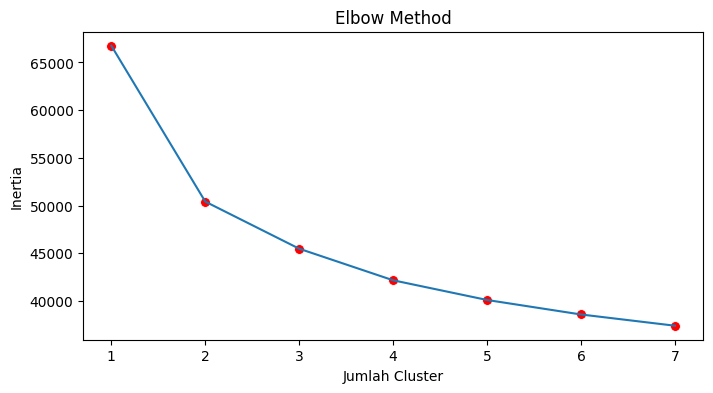

In [496]:
X = df_std.copy()
inertia = []

for i in range(1,8):
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(X)
    print(km.inertia_)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
sns.lineplot(x=np.arange(1,8), y=inertia)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
sns.scatterplot(x=range(1,8), y=inertia, s=50, color='red')

PCA

In [497]:
pca = PCA(n_components=2, random_state=21)
value = pca.fit_transform(df_std)
df_pca = pd.DataFrame(data=value, columns=['pc1','pc2'])
df_pca.head()

,pc1,pc2
0,4.649754,-0.625015
1,-2.951842,-0.380702
2,2.018475,-1.040232
3,-3.037823,0.912827
4,-0.499703,-0.799504


In [498]:
km_pca = KMeans(n_clusters=3, random_state=23)
km_pca.fit(df_pca)
cluster_pca_label = km_pca.labels_
df_pca['Cluster'] = cluster_pca_label

print(df_pca.shape)
df_pca.head(5)

(2225, 3)


,pc1,pc2,Cluster
0,4.649754,-0.625015,2
1,-2.951842,-0.380702,0
2,2.018475,-1.040232,2
3,-3.037823,0.912827,0
4,-0.499703,-0.799504,0


Text(0.5, 1.0, 'PCA 2D Visualization')

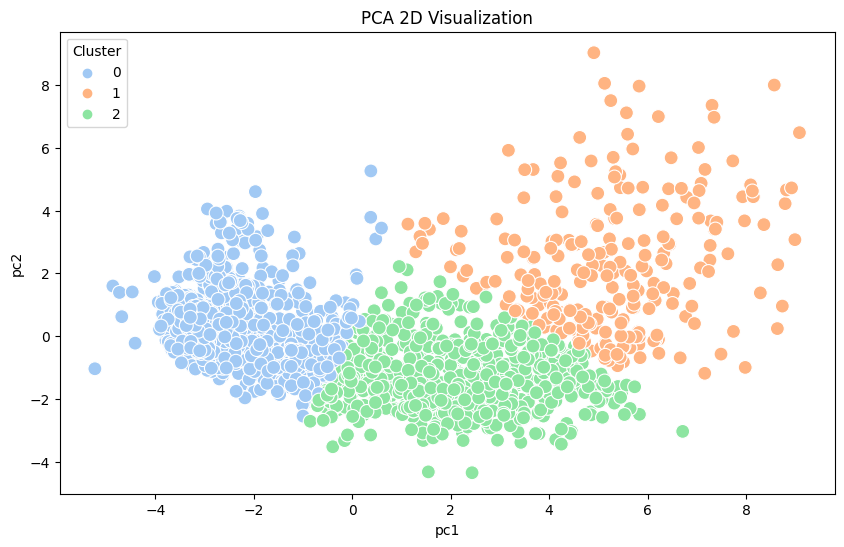

In [499]:
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='pc1', y='pc2', hue='Cluster', data=df_pca, palette='pastel', s=100)
plt.title('PCA 2D Visualization')

Silhoutte Score

In [500]:
from sklearn.metrics import silhouette_score

silhouette_score_arr = []
for i in range(2,9):
    kmean = KMeans(n_clusters = i).fit(X)
    predc = kmean.predict(X)
    score = silhouette_score(X,predc)
    silhouette_score_arr.append(np.round(score,2))
    print("On k =",i,"silhouette_score =",score)

On k = 2 silhouette_score = 0.275789563176531
On k = 3 silhouette_score = 0.19382992574612867
On k = 4 silhouette_score = 0.19460334187788744
On k = 5 silhouette_score = 0.20324702958263652
On k = 6 silhouette_score = 0.10316136776280509
On k = 7 silhouette_score = 0.16012709462769512
On k = 8 silhouette_score = 0.09833501430618267


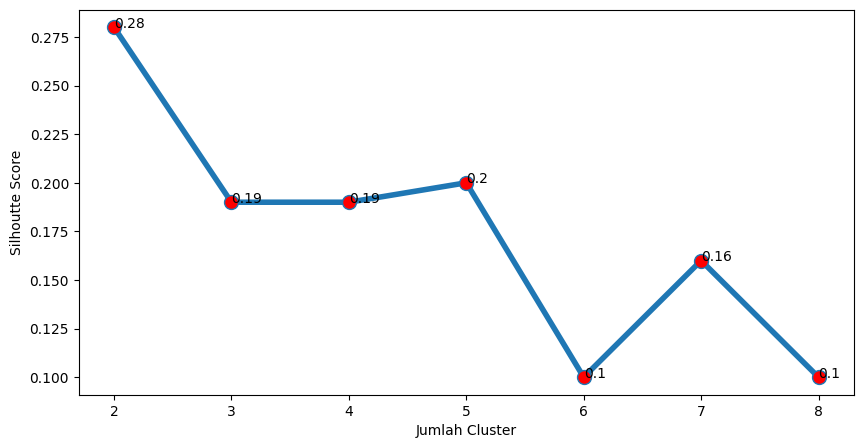

In [501]:
sil = range(2,9)

plt.figure(figsize=(10,5))
plt.plot(range(2,9),silhouette_score_arr,marker = 'o',
         markersize = 10,linewidth=4,markerfacecolor = 'red')

sns.scatterplot(x=sil,y=silhouette_score_arr)

#give text label for shilouette score
for i, label in enumerate(silhouette_score_arr):
    plt.text(sil[i], label, str(label))
    plt.xlabel('Jumlah Cluster')
    plt.ylabel('Silhoutte Score')

**Hasil Pengamatan:**
- Berdasarkan Elbow Method dan Silhoutte Score, dapat disimpulkan bahawa jumlah cluster yang optimal adalah 3. 
- Meskipun jumlah cluster 5 memiliki score yg lebih tinggi dibandingkan cluster 3, namun score-nya tidak berbeda jauh.

## Interpretasi Hasil

In [553]:
df_cluster = df_pca[['Cluster']]
df_new = df_pre[['Recency','Total_trx','Total_spent','CVR','Income','NumWebVisitsMonth','Total_acc_cmp']]

In [554]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(df_new)

df_pca['Cluster'] = kmeans.labels_
df_new['Cluster'] = kmeans.labels_

In [573]:
df_new.sample(5)

,Recency,Total_trx,Total_spent,CVR,Income,NumWebVisitsMonth,Total_acc_cmp,Cluster
1670,49,13,265000,1.86,37929000.0,7,3,1
657,92,11,210000,1.83,26490000.0,6,0,1
1585,37,6,49000,1.20,35860000.0,5,2,1
1023,51,6,71000,1.20,33564000.0,5,0,1
718,77,31,1185000,5.17,58710000.0,6,0,0


In [574]:
# menghitung jumlah customer per cluster
df_cust = df_new.groupby('Cluster').agg({'Recency':'count'}).reset_index()
df_cust.columns = ['Cluster','Total Customer']
df_cust['Percentage'] = round((df_cust['Total Customer']/df_cust['Total Customer'].sum())*100,0)
df_cust

,Cluster,Total Customer,Percentage
0,0,785,35.0
1,1,729,33.0
2,2,711,32.0


In [571]:
df_cluster_group = df_new.groupby('Cluster').agg({'Recency' : 'mean',
                                                  'Total_trx' : 'mean',
                                                  'Total_spent' : 'mean',
                                                  'CVR' : 'mean',
                                                  'Income' : 'mean',
                                                  'NumWebVisitsMonth' : 'mean',
                                                  'Total_acc_cmp' : 'mean'
                                                  }).reset_index()

round(df_cluster_group,2)

,Cluster,Recency,Total_trx,Total_spent,CVR,Income,NumWebVisitsMonth,Total_acc_cmp
0,0,49.90,15.77,469691.72,3.17,51697296.86,5.71,0.29
1,1,48.29,7.84,91753.09,1.23,28210285.32,6.92,0.21
2,2,49.12,21.01,1272645.57,8.90,75473382.56,3.31,0.86


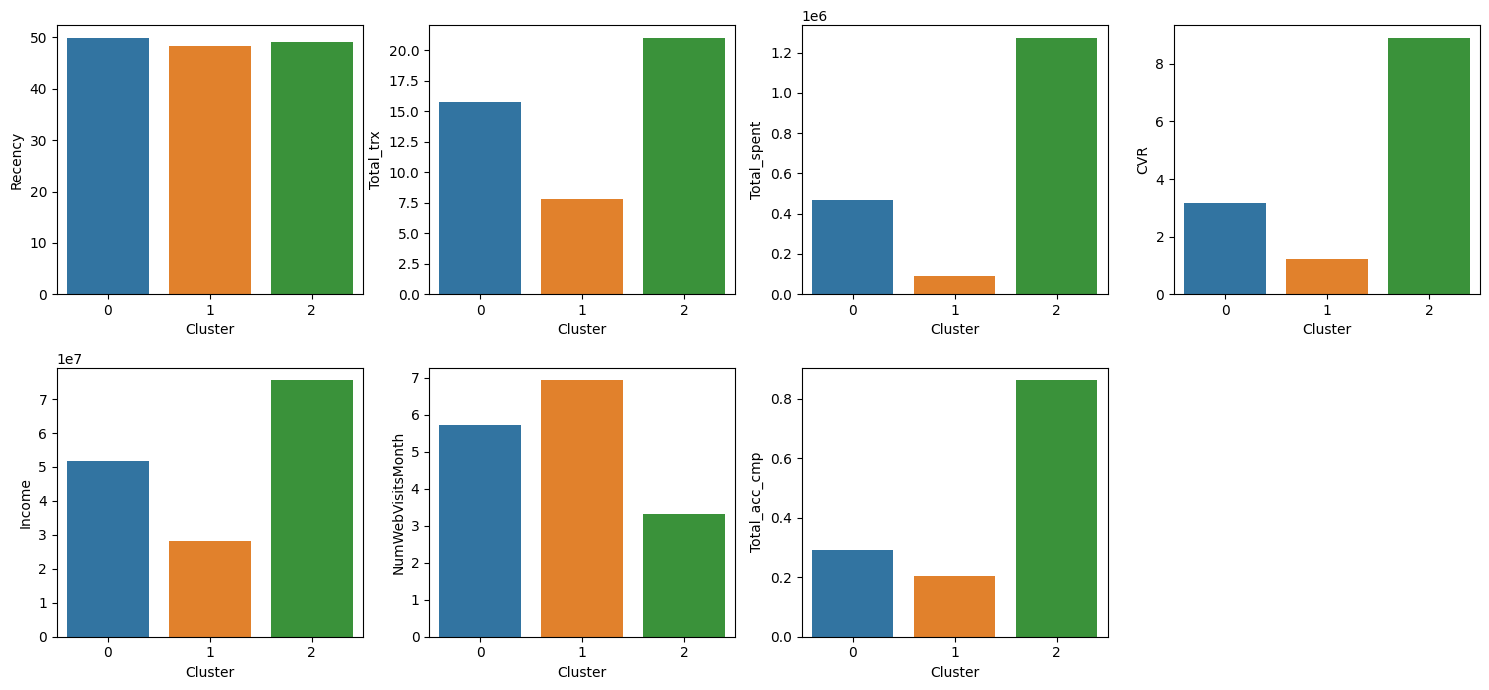

In [572]:
kolom = ['Recency','Total_trx','Total_spent','CVR','Income','NumWebVisitsMonth','Total_acc_cmp']

plt.figure(figsize=(15,7))
for i in range(len(kolom)):
    plt.subplot(2,4,i+1)
    sns.barplot(data=df_cluster_group, x='Cluster', y=kolom[i])
plt.tight_layout()

**Hasil Interpretasi:**

Berdasarkan cluster yang ada, maka dapat dikategorikan bahwa:
- Cluster 0 merupakan Mid Spender (sebanyak 785 customer atau 35%).
- Cluster 1 merupakan Low Spender (sebanyak 729 customer atau 33%).
- Cluster 2 merupakan High Spender (sebanyak 711 customer atau 32%).

**Karakteristik Cluster:**
- Cluster 0: Pelanggan dengan pendapatan dan pengeluaran yang sedang. Pelanggan ini juga cukup sering mengunjungi website setiap bulannya dan melakukan transaksi, walaupun kurang terlalu tertarik dengan campaign yang diberikan.
- Cluster 1: Pelanggan dengan pendapatan dan pengeluaran paling kecil. Pelanggan ini merupakan pelanggan yang paling sering mengunjungi website, namun jarang melakukan transaksi dan tidak tertarik dengan campaign yang ada. Pelanggan ini memiliki conversion rate paling rendah.
- Cluster 2: Pelanggan dengan pendapatan dan pengeluaran tertinggi. Pelanggan ini jarang mengunjungi website, tapi paling tertarik dengan campaign dan paling banyak melakukan transaksi.

**Rekomendasi Bisnis:**
- Membuat membership bagi pelanggan sesuai total spent per bulannya. Membership dapat dibagi menjadi 3 kategori, yaitu `Platinum`, `Gold`, dan `Silver`. Setiap kategori membership memiliki benefit masing-masing. Semakin tinggi membership-nya, maka semakin besar pula diskon atau cashback yang bisa didapatkan.
- Menargetkan campaign atau promo bagi cluster 1 (low spender). Dengan seringnya berkunjung ke website, pelanggan tipe ini harusnya memiliki peluang paling besar untuk melakukan transaksi. Hal ini membuktikan bahwa campaign perusahaan yang sebelumnya tidak cocok dan tidak tepat sasaran.
- Mempertahankan pelanggan cluster 2 (high spender) dengan memonitor transaksi mereka agar tetap loyal dan tidak churn.
- Perusahaan perlu mengetahui kebiasaan pelanggan dalam berbelanja dengan memberikan kuisioner, seperti produk yang paling sering dibeli dan tipe pembayaran yang lebih disukai. Dengan adanya kuisioner ini juga dapat digunakan untuk meninjau kembali campaign yang sudah dilakukan sebelumnya.